In [66]:
import numpy as np
import torch
import botorch
import gpytorch

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

from helper_functions.utils import *
from helper_functions.surrogate_model import *
from helper_functions.cost_model_regression import init_cost_model, get_best_system_params
from helper_functions.artificial_functions import cost

%load_ext autoreload
%autoreload 2

torch.set_default_dtype(torch.float64) # avoid matrix not positive semi-definite

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
# Generate Training data
# keep everything constant, only vary nnodes
phi = 0
chi = 0
ntasks = 6
mem = 4
nnodes = None # this will be set randomly

nnodes_range = torch.randint(2,32, (1000,))

train_x = torch.ones((1000,5))
train_x[:, 0] = train_x[:, 0]*phi
train_x[:, 1] = train_x[:, 1]*chi
train_x[:, 3] = train_x[:, 3]*ntasks
train_x[:, 4] = train_x[:, 4]*mem
train_x[:, 2] = train_x[:, 2]*train_x

train_y = cost(train_x) # generate cost on de-normalized data
train_x = to_n_unit_cube(train_x) # normalize data

In [75]:
# Train model
model, likelihood = init_cost_model(train_x, train_y)
model.eval()
likelihood.eval()
None

In [76]:
# test output and compare with actual function
# creating the testing points
# everything remains constant only nnodes varies
test_x = torch.ones((10000,5))
test_x[:, 0] = test_x[:, 0]*phi
test_x[:, 1] = test_x[:, 1]*chi
test_x[:, 3] = test_x[:, 3]*ntasks
test_x[:, 4] = test_x[:, 4]*mem

nnodes_range = torch.linspace(2,32, 10000)
test_x[:, 2] = test_x[:, 2]*nnodes_range
test_x = to_n_unit_cube(test_x)

with torch.no_grad():
    observed_pred = likelihood(model(test_x))

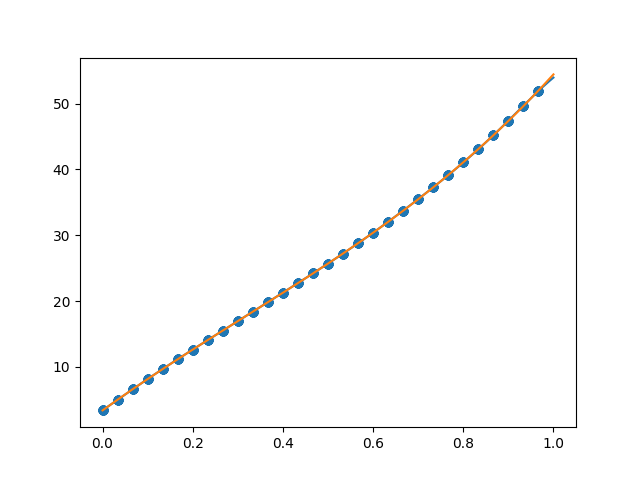

In [77]:
# plot posterior distribution, training pts & actual function
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(test_x[:,2], observed_pred.mean.numpy())
ax.plot(test_x[:,2], evaluate_cost(test_x))
ax.scatter(train_x[:,2], train_y)